# Álgebra Linear Numérica
Uma breve revisão de aspectos básicos da álgebra linear usando [Julia](http://julialang.org/)

- *Disciplinas*: **EAMB018-A**, **EPET019-A**
- *Professores*: [Adeildo S. Ramos Jr](mailto:adramos@ctec.ufal.br), [Luciana C. L. M. Vieira](mailto:luciana.vieira@ctec.ufal.br)
- *Tutores*: [Leonardo T. Ferreira](mailto:leonardo.ferreira@ctec.ufal.br), [Paulo Victor L. Santos](mailto:paulo.santos@ctec.ufal.br), [Ricardo A. Fernandes](mailto:ricardo.fernandes@ctec.ufal.br)


- Referências:
    - Kochenderfer, M. J.; Wheeler, T. A. (2019) Algorithms for Optimization. MIT Press.
    - Banas, D. (2018) Julia Tutorial, http://www.newthinktank.com/2018/10/julia-tutorial
    - Poole, D. (2015) Linear Algebra: A Modern Introduction, 4th Edition. Cengage Laerning.
    - Chapra, S. C. (2012) Applied Numerical Methods with MATLAB for Engineers and Scientists, 3th Edition. McGraw-Hill.
    - Bezanson, J.; Edelman, A.; Karpinski, S.; Shah V. B. (2017) Julia: A Fresh Approach to Numerical Computing. SIAM Review, 59: 65-98.

**Assuntos**

- [Vetores](#Vetores)
  - [Criando vetores](#Criando-vetores)
  - [Acessando um elemento do vetor](#Acessando-um-elemento-do-vetor)
  - [Acessando múltiplos elementos](#Acessando-múltiplos-elementos)
  - [Calculando tamanho, soma, e valores máximos e mínimos](#Calculando-tamanho,-soma-e-valores-máximos-e-mínimos)
  - [Operações in-place](#Operações-in-place)
  - [Somando e multiplicando por escalar](#Somando-e-multiplicando-por-escalar)
  - [Usando o pacote LinearAlgebra](#Usando-o-pacote-LinearAlgebra)
  - [Operações elemento a elemento](#Operações-elemento-a-elemento)
  - [Importante](#Importante)
  
  
- [Matrizes](#Matrizes)
	- [Criando matrizes](#Criando-matrizes)
	- [Acessando elementos das matrizes](#Acessando-elementos-das-matrizes)
	- [Algumas matrizes especiais](#Algumas-matrizes-especiais)
	- [Tamanho, soma e valores máximos e mínimos em matrizes](#Tamanho,-soma-e-valores-máximos-e-mínimos-em-matrizes)
	- [Concatenação com matrizes](#Concatenação-com-matrizes)
	- [Operações matriciais](#Operações-matriciais)
    
    
- [Independência linear de vetores](#Independência-linear-de-vetores)


- [Sistema de equações lineares](#Sistema-de-equações-lineares)
    - [Exercício #1: Nível de poluição em um restaurante](#Exerc%C3%ADcio-#1:-N%C3%ADvel-de-polui%C3%A7%C3%A3o-em-um-restaurante)


- [Autovalores e autovetores](#Autovalores-e-autovetores)
    - [Exercício #2: Modelo dinâmico para terremotos](#Exerc%C3%ADcio-#2:-Modelo-din%C3%A2mico-para-terremotos)

## Vetores
- Um vetor (ver Figura 1) é uma entidade matemática 1D que armazena uma sequência de valores
- Pode ser construído usando colchetes, separando os elemento por vírgulas

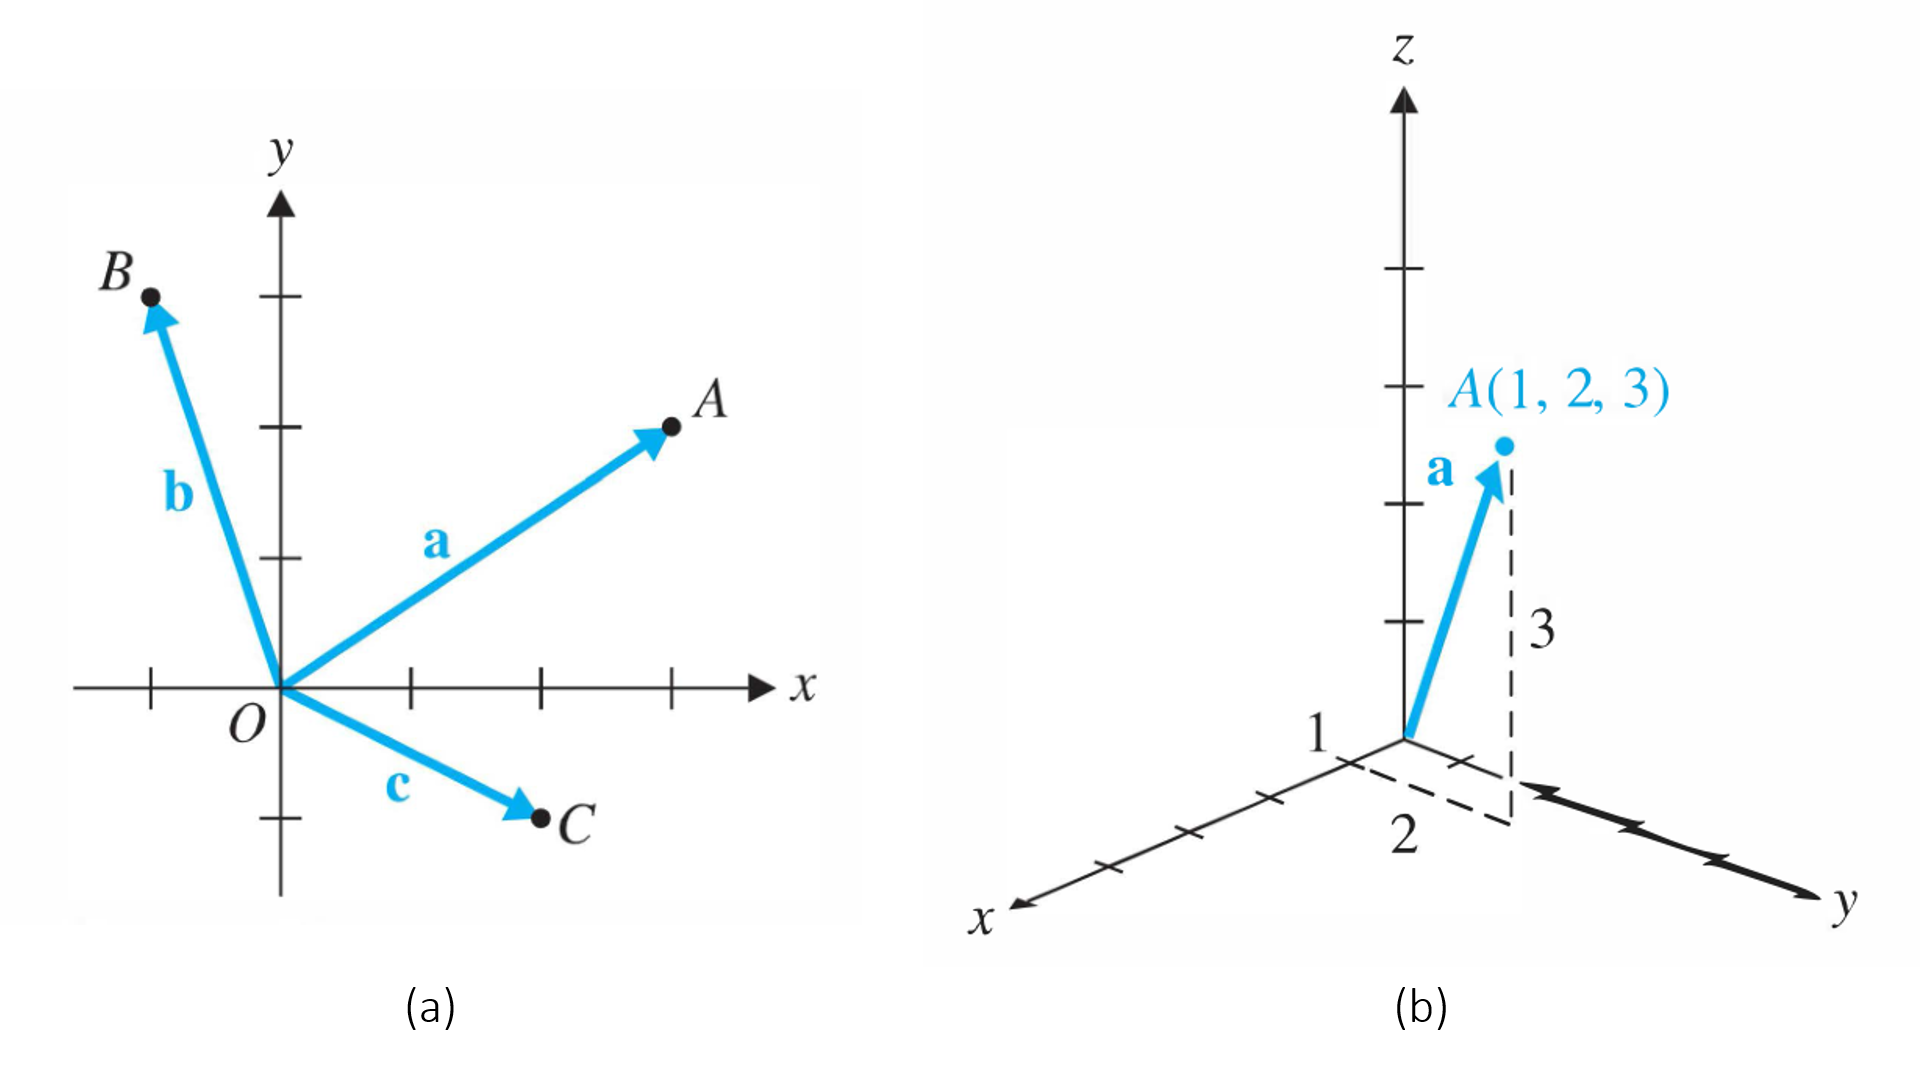
<p style="text-align: center;"> Figura 1: Vetores: (a) no plano; (b) no espaço.</p>

### Criando vetores

In [1]:
x = []  # vetor vazio

Any[]

In [2]:
x = trues(3)  # vetor com 3 boleanos (verdadeiros)

3-element BitArray{1}:
 1
 1
 1

In [3]:
print(x)  # o comanda print será utilizado apenas para horizontalizar os vetores!

Bool[1, 1, 1]

In [4]:
x = ones(4)  # vetor com 4 números 1
print(x)

[1.0, 1.0, 1.0, 1.0]

In [5]:
x = zeros(5)  # vetor com 5 números 0
print(x)

[0.0, 0.0, 0.0, 0.0, 0.0]

In [6]:
x = rand(3)  # vetor com 3 números randômicos entre 0 e 1
print(x)

[0.846924406189806, 0.9752844418126145, 0.9640828198203117]

In [7]:
x = [3, 1, 4] # vetor com 3 números inteiros
print(x)

[3, 1, 4]

In [8]:
x = [3.1415, 1.618, 2.7182]  # vetor de números reais
print(x)

[3.1415, 1.618, 2.7182]

### Acessando um elemento do vetor

In [9]:
x[1]  # primeiro elemento é indexado com 1

3.1415

In [10]:
x[3]  # terceiro elemento

2.7182

In [11]:
x[end]  # último elemento

2.7182

In [12]:
x[end - 1]  # penúltimo elemento

1.618

### Acessando múltiplos elementos

In [13]:
x = [1, 1, 2, 3, 5, 8, 13]
print(x)

[1, 1, 2, 3, 5, 8, 13]

In [14]:
print(x[1:3])  # os 3 primeiros elementos

[1, 1, 2]

In [15]:
print(x[1:2:end])  # os elementos com índices ímpares

[1, 2, 5, 13]

In [16]:
print(x[end:-1:1])  # na ordem reversa

[13, 8, 5, 3, 2, 1, 1]

In [17]:
print(x[[1, end]])  # o primeiro e o último elemento

[1, 13]

In [18]:
print( [x[1:3]; x[5:7]] )  # concatenando sub-vetores

[1, 1, 2, 5, 8, 13]

### Calculando tamanho, soma e valores máximos e mínimos

In [19]:
length(x)  # tamanho

7

In [20]:
sum(x)  # soma dos elementos do vetor

33

In [21]:
maximum(x)  # valor máximo

13

In [22]:
minimum(x)  # valor mínimo

1

### Operações *in-place*
- Escreve o resultado na própria variável
- Modifica o vetor

In [23]:
print(x)

[1, 1, 2, 3, 5, 8, 13]

In [24]:
push!(x, -1)  # adiciona um elemento no final
print(x)

[1, 1, 2, 3, 5, 8, 13, -1]

In [25]:
pop!(x)  # remove o elemento do final (retorna o elemento removido)

-1

In [26]:
print(x)

[1, 1, 2, 3, 5, 8, 13]

In [27]:
append!(x, [2, 3])  # adiciona no final do vetor
print(x)

[1, 1, 2, 3, 5, 8, 13, 2, 3]

In [28]:
sort!(x)  # ordena os elementos do vetor
print(x)

[1, 1, 2, 2, 3, 3, 5, 8, 13]

In [29]:
x[1] = -3  # altera o primeiro elemento
print(x)

[-3, 1, 2, 2, 3, 3, 5, 8, 13]

### Somando e multiplicando por escalar

In [30]:
x = [1, 2]
y = [3, 4]

print(x + y)  # somando vetores

[4, 6]

In [31]:
print(3x - [1, 2])  # multiplcando por um escalar e subtraindo

[2, 4]

### Usando o pacote LinearAlgebra

In [32]:
dot(x, y)

LoadError: UndefVarError: dot not defined

In [33]:
using LinearAlgebra

In [34]:
dot(x, y)  # produto interno

11

In [35]:
x ⋅ y  # produto interno com notação matemática \cdot<tab>

11

In [36]:
x = rand(3)
y = rand(3)

z = cross(x, y) # produto vetorial
print(z)

[0.07932514379465072, 0.07466869668179876, -0.27418275446764456]

In [37]:
print(x × y)  # usando notação matemática \times<tab>

[0.07932514379465072, 0.07466869668179876, -0.27418275446764456]

In [38]:
x = [3, 4]

norm(x)  # norma L2 de um vetor

5.0

In [39]:
norm(x, 2)  # norma L2

5.0

In [40]:
norm(x, 1)  # norma L1

7.0

In [41]:
norm(x, Inf)  # norma Inf

4.0

### Operações elemento a elemento

In [42]:
x = [1, 2]
y = [3, 4]

print(x .* y)  # multiplicação

[3, 8]

In [43]:
print(x .^ 2)  # quadrado

[1, 4]

In [44]:
print(sin.(x))  # aplicação de seno

[0.8414709848078965, 0.9092974268256817]

In [45]:
print(sqrt.(x))  # aplicação de raiz quadrada

[1.0, 1.4142135623730951]

In [46]:
print(max.(x, 1.5))  # aplicação de max{xᵢ, 1.5}

[1.5, 2.0]

### Importante
- Em Julia, Arrays não são copiados durante atribuição a outra variável!
- Semelhante a Python

In [47]:
b = [1, 2, 3, 4]
a = b

b[2] = 20
println("a: ", a)
println("b: ", b)

a: [1, 20, 3, 4]
b: [1, 20, 3, 4]


In [48]:
b = [1, 2, 3, 4]
a = b
c = copy(b)

b[2] = 20
println("a: ", a)
println("b: ", b)
println("c: ", c)  # c é uma cópia de b

a: [1, 20, 3, 4]
b: [1, 20, 3, 4]
c: [1, 2, 3, 4]


## Matrizes
- Uma matriz é uma entidade matemática 2D
- Como um vetor, pode ser construída usando colchetes
- Use espaços para delimitar elementos em uma mesma linha
- Use 'ponto e vírgula' para delimitar linhas

### Criando matrizes

In [49]:
X = [1 2 3; 4 5 6; 7 8 9; 10 11 12]  # matriz 4x3 de inteiros

4×3 Array{Int64,2}:
  1   2   3
  4   5   6
  7   8   9
 10  11  12

In [50]:
X = [1.0 -2.0 3.0; 4.0 5.0 -6.0]  # matrix 2x3 de reais

2×3 Array{Float64,2}:
 1.0  -2.0   3.0
 4.0   5.0  -6.0

In [51]:
X = zeros(2, 2)  # matriz 2x2 de zeros 

2×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0

In [52]:
X = rand(3, 100) # matriz 3x100 de números randômicos entre 0 e 1

3×100 Array{Float64,2}:
 0.602134  0.317558  0.379608  0.928186  …  0.508693  0.704689  0.743227
 0.293479  0.745743  0.437692  0.734199     0.195947  0.39844   0.0316475
 0.179527  0.431377  0.194558  0.63203      0.317086  0.951075  0.749535

### Acessando elementos das matrizes

In [53]:
X = [1.0 2.0 3.0; 4.0 5.0 6.0; 7.0 8.0 9.0]

3×3 Array{Float64,2}:
 1.0  2.0  3.0
 4.0  5.0  6.0
 7.0  8.0  9.0

In [54]:
X[2, 3]  # elemento da linha 2, coluna 3

6.0

In [55]:
X[3]  # terceiro elemento usando ordenação baseada em colunas

7.0

In [56]:
print(X[1, :])  # primeira linha

[1.0, 2.0, 3.0]

In [57]:
print(X[: ,2])  # segunda coluna

[2.0, 5.0, 8.0]

In [58]:
println(X[1:2, :])  # as duas primeiras linhas

[1.0 2.0 3.0; 4.0 5.0 6.0]


In [59]:
# sub-matriz com a intersecção entre as linhas 1 e 3 e as colunas 2 e 3
println(X[[1, 3], [2, 3]])

[2.0 3.0; 8.0 9.0]


### Algumas matrizes especiais

In [60]:
eye = Matrix(1.0I, 3, 3)  # matrix identidade 3x3

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [61]:
diag = Matrix(Diagonal([1.5, 2.5, 3.5]))  # matriz diagonal 3x3

3×3 Array{Float64,2}:
 1.5  0.0  0.0
 0.0  2.5  0.0
 0.0  0.0  3.5

In [62]:
A = [1. 2. 3.; 4. 5. 6.; 7. 8. 9.]

# transposta de A
println(transpose(A))  

# transposta conjugada complexa de A
println(A')  # semelhante à transposta para números reais

[1.0 4.0 7.0; 2.0 5.0 8.0; 3.0 6.0 9.0]
[1.0 4.0 7.0; 2.0 5.0 8.0; 3.0 6.0 9.0]


In [63]:
A = [3 1; 1 3]

println(det(A))  # determinante de A
println(inv(A))  # matriz inversa de A

8.0
[0.375 -0.125; -0.125 0.375]


### Tamanho, soma e valores máximos e mínimos em matrizes

In [64]:
A = [1. 2. 3.; 4. 5. 6.]

2×3 Array{Float64,2}:
 1.0  2.0  3.0
 4.0  5.0  6.0

In [65]:
size(A) # número de linhas e colunas da matriz A
print("A é uma matriz ", size(A, 1), "x", size(A, 2))

A é uma matriz 2x3

In [66]:
sum(A)  # soma de todos os elementos de A

21.0

In [67]:
# soma ao longo da dimensão 1 (linhas)
sum(A, dims=1)  # retorna uma matriz

1×3 Array{Float64,2}:
 5.0  7.0  9.0

In [68]:
# soma ao longo da dimensão 2 (colunas)
sA2 = sum(A, dims=2)  # retorna uma matriz

2×1 Array{Float64,2}:
  6.0
 15.0

In [69]:
typeof(sA2)  # consulta tipo da variável sA2

Array{Float64,2}

In [70]:
typeof(sA2) == Matrix{Float64}

true

In [71]:
vsA2 = vec(sA2)  # vetoriza a matriz usando ordenação baseada em colunas

2-element Array{Float64,1}:
  6.0
 15.0

In [72]:
typeof(vsA2) # consulta tipo da variável vsA2

Array{Float64,1}

In [73]:
typeof(vsA2) == Vector{Float64}

true

In [74]:
A

2×3 Array{Float64,2}:
 1.0  2.0  3.0
 4.0  5.0  6.0

In [75]:
println(minimum(A))          # valor mínimo de A
println(minimum(A, dims=1))  # mínimo ao longo da dimensão 1
println(minimum(A, dims=2))  # mínimo ao longo da dimensão 2

println(maximum(A))          # valor máximo de A
println(maximum(A, dims=1))  # máximo ao longo da dimensão 1
println(maximum(A, dims=2))  # máximo ao longo da dimensão 2

1.0
[1.0 2.0 3.0]
[1.0; 4.0]
6.0
[4.0 5.0 6.0]
[3.0; 6.0]


### Concatenação com matrizes

In [76]:
X = [1. 2. 3.; 4. 5. 6.]
println(X); println(size(X))

# concatenação horizontal
H = [X X]

[1.0 2.0 3.0; 4.0 5.0 6.0]
(2, 3)


2×6 Array{Float64,2}:
 1.0  2.0  3.0  1.0  2.0  3.0
 4.0  5.0  6.0  4.0  5.0  6.0

In [77]:
# concatenação vertical
V = [X; X]

4×3 Array{Float64,2}:
 1.0  2.0  3.0
 4.0  5.0  6.0
 1.0  2.0  3.0
 4.0  5.0  6.0

In [78]:
# simplesmente funciona!
[rand(3, 3) ones(3, 2); zeros(2, 3) I]

5×5 Array{Float64,2}:
 0.413306  0.542592  0.60654   1.0  1.0
 0.284025  0.402196  0.526341  1.0  1.0
 0.400678  0.636846  0.107467  1.0  1.0
 0.0       0.0       0.0       1.0  0.0
 0.0       0.0       0.0       0.0  1.0

### Operações matriciais

In [79]:
A = rand(3, 3)

3×3 Array{Float64,2}:
 0.875752   0.700759  0.319929
 0.801404   0.908722  0.955441
 0.0742541  0.377876  0.215837

In [80]:
B = rand(3, 3)

3×3 Array{Float64,2}:
 0.718541  0.442934   0.095353
 0.940393  0.874584   0.923475
 0.220464  0.0805251  0.786648

In [81]:
A + B  # soma

3×3 Array{Float64,2}:
 1.59429   1.14369   0.415282
 1.7418    1.78331   1.87892
 0.294718  0.458401  1.00248

In [82]:
B - 2A # subtração

3×3 Array{Float64,2}:
 -1.03296    -0.958583  -0.544505
 -0.662416   -0.94286   -0.987406
  0.0719561  -0.675226   0.354973

In [83]:
m = 2; n = 4; p = 3
rand(m, n) * rand(n, p)  # multiplicação de matrizes randômicas

2×3 Array{Float64,2}:
 1.41707   1.30614   0.321865
 0.294827  0.397043  0.118522

In [84]:
A = [4. 1.; 2. 3.]
b = [6., 8.]
x = A \ b  # resolve sistema de equações lineares (forma matricial, Ax = b)

2-element Array{Float64,1}:
 1.0
 2.0

## Independência linear de vetores

Um conjunto de vetores do $\mathbb{R}^n$ é dito linearmente independente se conseguem representam qualquer vetor do $\mathbb{R}^n$ através de uma combinação linear.

Por exemplo, no $\mathbb{R}^2$, imagine os vetores canônicos $\hat{\boldsymbol{x}} = \begin{bmatrix}1 & 0\end{bmatrix}^T$ e $\hat{\boldsymbol{y}} = \begin{bmatrix}0 & 1\end{bmatrix}^T$.

Qualquer vetor, $\boldsymbol{u} = \begin{bmatrix}a & b\end{bmatrix}^T$ pode ser obtido através da combinação linear $\boldsymbol{u} = a \hat{\boldsymbol{x}} + b \hat{\boldsymbol{y}}$. Neste caso, $a$ e $b$ são chamados de coeficientes da combinação linear.

Quando um conjunto de vetores é linearmente independente, diz-se que estes formam uma base para um dado espaço vetorial.

Por exemplo, na Figura 2 abaixo,
- Os vetores $\boldsymbol{u}$ e $\boldsymbol{v}$ são linearmente independentes e formam uma base para o plano $P$.
- Já os vetores $\boldsymbol{u}$ e $\boldsymbol{j}$ são linearmente dependentes, pois são paralelos.
- Os vetores $\boldsymbol{u}$, $\boldsymbol{w}$ e $\boldsymbol{k}$ são linearmente independentes, formando, neste caso, uma base para um espaço vetorial de três dimensões.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Vectores_independientes.png"
     alt="independencia"
     width="450"/>
<p style="text-align: center;"> Figura 2: Conjunto de vetores.</p>

Suponha agora que um conjunto de vetores componham as colunas de uma matriz, a independência linear desse conjunto pode ser avaliada através do posto dessa matriz.

In [85]:
v1 = [1., 0.]
v2 = [0., 1.]

A = [v1 v2]

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [86]:
rank(A)  # o posto da matriz (rank)

2

O posto da matriz retorna o número de vetores linearmente independentes no subespaço vetorial testado.

In [87]:
A = [v1 v2 2*v1]

2×3 Array{Float64,2}:
 1.0  0.0  2.0
 0.0  1.0  0.0

In [88]:
rank(A)

2

## Sistema de equações lineares

Uma equação linear com $n$ variáveis é uma equação que pode ser escrita na forma:

$a_1 x_1 + a_2 x_2 + \ldots + a_n x_n = b$,

onde os coeficientes $a_1, a_2, \ldots, a_n$ e o termo $b$ são constantes.

- Exemplos de **equações lineares**:
    - $3x - 4y = -1$
    - $x_1 + 5x_2 =3 - x_3 + 2x_4$
    - $\sqrt{2}x + \frac{\pi}{4} y - \left(sin \frac{\pi}{5}\right)z = 1$
    - $3.2 x_1 - 0.01 x_2 =  4.6$


- Exemplos de **equações não lineares**:
    - $xy + 2z = 1$
    - $x_1^2 - x_2^3 = 3$
    - $\sqrt{2x} + \frac{\pi}{4} y - \left(sin \frac{\pi}{5}z\right) = 1$
    - $\frac{x}{y} + z = 2$

Um **sistema de equações lineares** é um conjunto finito de equações lineares, cada uma com as mesmas variáveis. Uma **solução** doe um sistema de equações lineares é um vetor que é *simultaneamente* a solução de cada uma das equações do sistema. O **conjunto solução** de um sistema de equações lineares é o conjunto de todas as soluções do sistema.

O sistema
$\begin{align}
2 x - y &= 3\\
x + 3y &= 5
\end{align}$

tem [2, 1] como uma solução, visto que é uma solução de ambas as equações. Por outro lado, [1 -1] não é uma soução do sistema, visto que satisfaz apenas à primeira equação.

Considere os seguintes sistemas de equações lineares:

(a) $\begin{align}
x - y &= 1\\
x + y &= 3
\end{align}$, (b) $\begin{align}
x - y &= 2\\
2x - 2y &= 4
\end{align}$, (c) $\begin{align}
x - y &= 1\\
x - y &= 3
\end{align}$


Se plotarmos as retas que representam cada uma das equações lineares, tem-se:

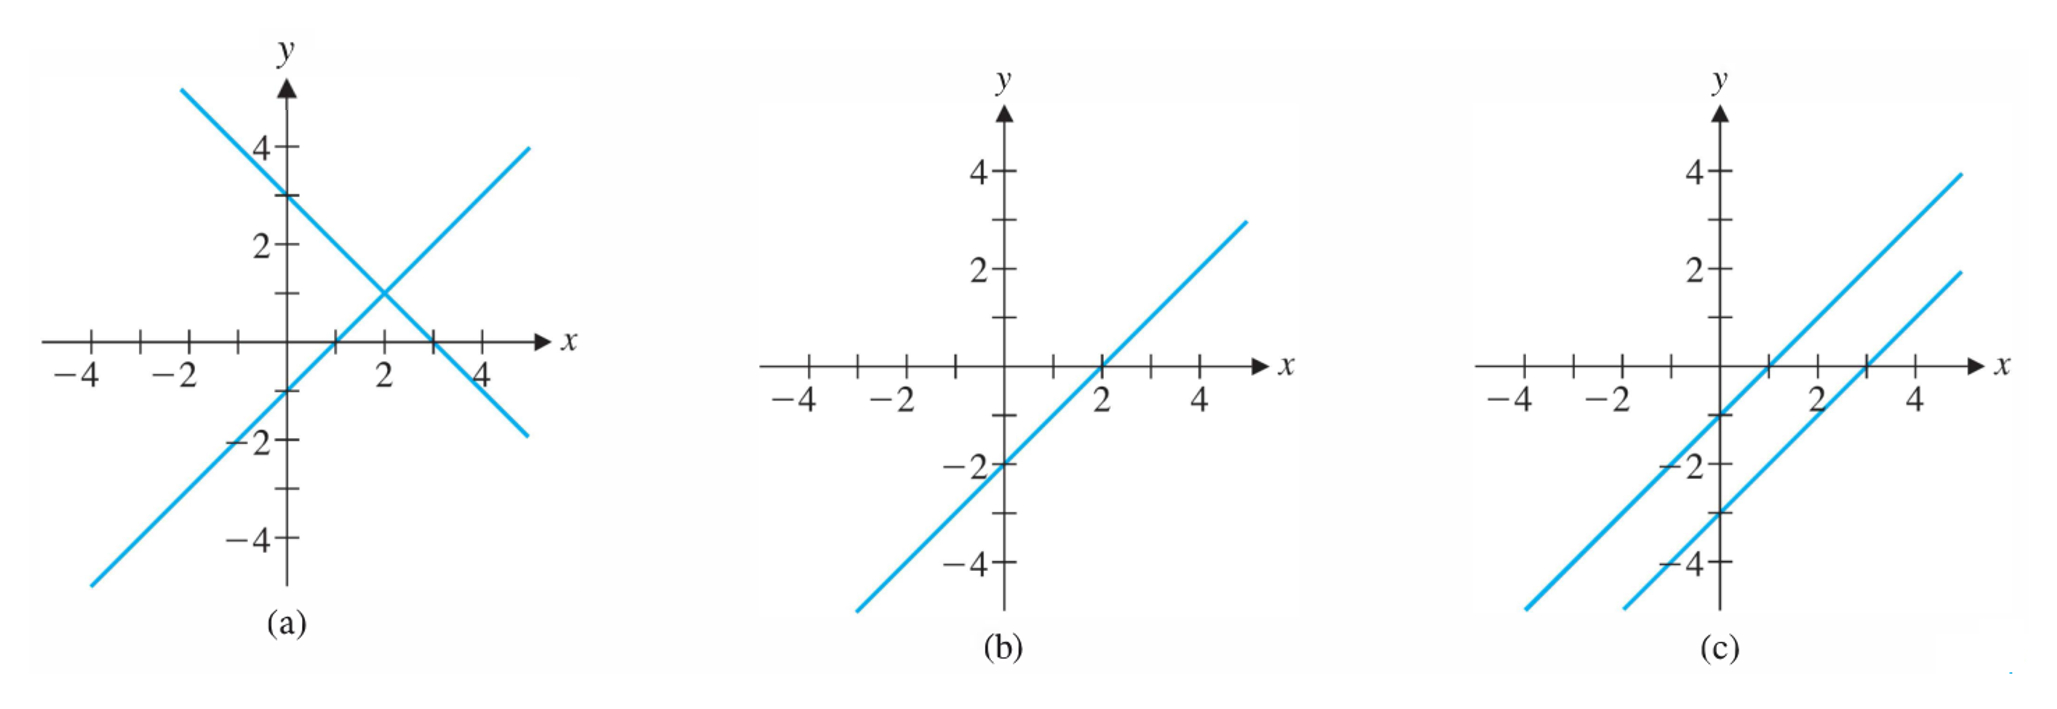
<p style="text-align: center;"> Figura 3: Equações lineares representadas graficamente no plano.</p>

Assim, é fácil identificar que
- o sistema (a) possui uma solução única [2, 1] (intersecção entre as retas)
- o sistema (b) possui infinitas soluções (retas coincidentes)
- o sistema (c) não possui solução (retas paralelas)


e pode-se classificar um sistema de equações lineares como
- **Consistente**: se tem pelo menos uma solução
- **Inconsistente**: se não possui solução

Um sistema de equações lineares pode ainda ser representado em sua **forma matricial**, $\boldsymbol{A} \boldsymbol{x} = \boldsymbol{b}$,

$\begin{bmatrix}
a_{11} & a_{12} & \ldots & a_{1n}\\
a_{21} & a_{22} & \ldots & a_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \ldots & a_{nn}
\end{bmatrix} \begin{bmatrix} x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix} = \begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n
\end{bmatrix}$

em que $\boldsymbol{A}$ é a matriz dos coeficientes, $\boldsymbol{x}$ é o vetor de incógnitas e $\boldsymbol{b}$ é o vetor de constantes.

Para o sistema (a) acima, tem-se que

In [89]:
Aa = [1 -1; 1 1]

2×2 Array{Int64,2}:
 1  -1
 1   1

In [90]:
ba = [1, 3]

2-element Array{Int64,1}:
 1
 3

Em Julia, o sistema pode ser resolvido usando o operador **\**

In [91]:
xa = Aa \ ba

2-element Array{Float64,1}:
 2.0
 1.0

Também é possível constatar que se o **posto da matriz** de coeficientes for igual à ordem $n$ do sistema, então, todos os vetores-coluna de $\boldsymbol{A}$ são linearmente independentes e o sistema admite **solução única**.

In [92]:
rank(A)  # posto da matriz A de coeficientes para o sistema (a)

2

Ao definirmos a matriz de coeficientes para os sistemas (b) e (c), observamos que nem todos os vetores-coluna de $\boldsymbol{A}$ são linearmente independentes, e que, portanto, estes sistemas não possuem solução única.

In [93]:
Ab = [1 -1; 2 -2]
rank(Ab)

1

In [94]:
Ac = [1 -1; 1 -1]
rank(Ac)

1

### Exercício #1: Nível de poluição em um restaurante

Suponha que você está estudando o sistema de ventilação de um restaurante. 

A geometria do restaurante (ver Figura 4) consiste em três áreas principais:
- Área de fumantes (sala 1)
- Area das crianças (sala 2)
- Área alongada (salas 3 e 4)

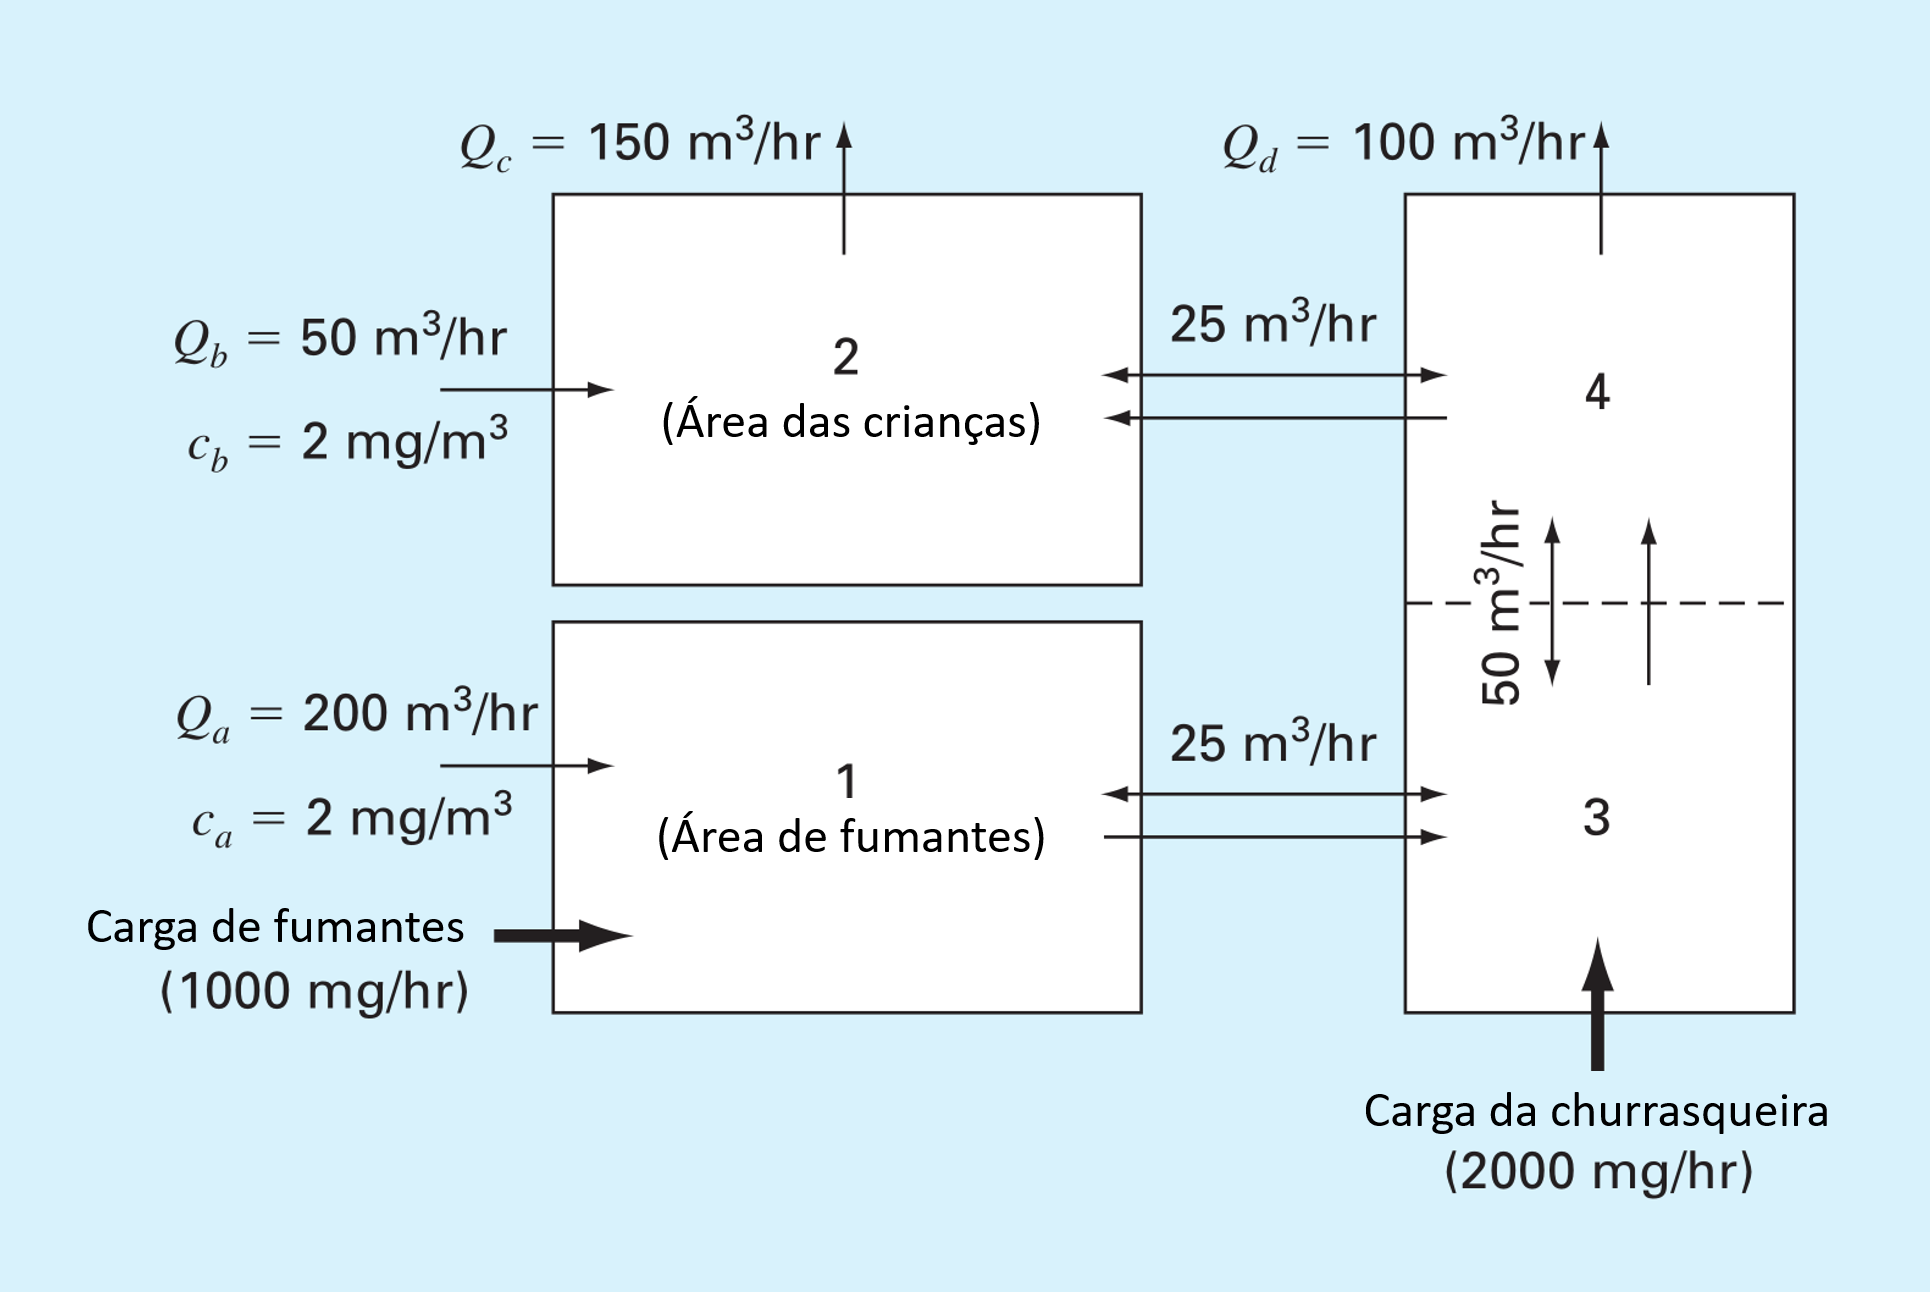
<p style="text-align: center;"> Figura 4: Detalhamento do restaurante para o Exercício #1.</p>

A salas 1 e 3 têm fontes de monóxido de carbono de fumantes e de uma churrasqueira com defeito, respectivamente. Além disso, as salas 1 e 2 recebem monóxido de carbono de entradas de ar que estão posicionadas ao lado da estrada.

**Escreva o balanço de massa estacionário para cada sala e resolva o sistema de equações lineares resultante para determinar as concentrações de monóxido de carbono em cada sala.**

Por exmeplo, para a sala 1, tem-se

$\begin{align}
&W_\text{fumantes} &+ Q_a c_a &- Q_a c_1 &+ E_{13}\left(c_3 - c_1\right) &= 0 \\
&\text{(Carga)} &\text{(Entrada)} &\text{(Saída)} &\text{(Mistura)} &
\end{align}$

Montar os balanços de massa para as outras salas e determinar as concentrações de CO em cada sala.

In [116]:
# Escreva seu código aqui


## Autovalores e autovetores

Considere uma matriz $\boldsymbol{A}$ quadrada,

- Um escalar $\lambda$ é chamado **autovalor** de $\boldsymbol{A}$ se existir um vetor não nulo $\boldsymbol{x}$ tal que $\boldsymbol{A}\boldsymbol{x} = \lambda\boldsymbol{x}$
- Este vetor $\boldsymbol{x}$ é chamado **autovetor** de $\boldsymbol{A}$ associado a $\lambda$.

Por exemplo, dada a matriz $\boldsymbol{A} = \begin{bmatrix}
3 & 1 \\
1 & 3
\end{bmatrix}$, $\boldsymbol{x} = \begin{bmatrix}
1\\
1
\end{bmatrix}$ é um autovetor de $\boldsymbol{A}$, visto que

$\boldsymbol{A}\boldsymbol{x} = \begin{bmatrix}
3 & 1 \\
1 & 3
\end{bmatrix} \begin{bmatrix}
1 \\
1
\end{bmatrix} = \begin{bmatrix}
4 \\
4
\end{bmatrix} = 4 \boldsymbol{x}$,
sendo 4 o autovalor asssociado a $\boldsymbol{x}$.

Uma matriz $\boldsymbol{Q}$ $n$x$n$ é **ortogonal** e todas as suas colunas, representadas pelo conjunto de vetores $\left\{\boldsymbol{v}_1, \ldots, \boldsymbol{v}_n\right\}$, formarem um conjunto ortonormal, ou seja, se todos os pares distintos desses vetores forem ortogonais e se todos os vetores do conjunto forem unitários.

Logo, a condição de ortogonalidade da matriz $\boldsymbol{Q}$ é representada por

$\boldsymbol{v}_i \cdot \boldsymbol{v}_j = \delta_{ij}$, para $i, j = 1, \ldots, n$, e sendo $\delta_{ij}$ o [delta de Kronecker](https://pt.wikipedia.org/wiki/Delta_de_Kronecker).

Esta expressão pode ser reescrita em termos dos componentes da matriz por:

$\sum_{k=1}^n {Q_{ki}Q_{kj} = \delta_{ij}}$

o que siginifica que matricialmente, 
$\boldsymbol{Q}^T \boldsymbol{Q} = \boldsymbol{I}$, sendo $\boldsymbol{I}$ a matriz identidade $n$x$n$,

ou ainda que, se $\boldsymbol{Q}$ for ortogonal, tem-se que sua inversa é igual à sua transposta, $\boldsymbol{Q}^{-1} = \boldsymbol{Q}^T$.

Se uma dada matriz $\boldsymbol{A}$ é simétrica, $\boldsymbol{A} = \boldsymbol{A}^T$, então quaisquer dois autovetores correspondentes a autovalores distintos de $\boldsymbol{A}$ são ortogonais:

- Sejam $\boldsymbol{v}_1$ e $\boldsymbol{v}_2$ dois autovetores associados a autovalores distintos $\lambda_1 \neq \lambda_2$.
- Sabe-se que $\boldsymbol{A} \boldsymbol{v}_1 = \lambda_1 \boldsymbol{v}_1$ e $\boldsymbol{A} \boldsymbol{v}_2 = \lambda_2 \boldsymbol{v}_2$.

$\begin{align}
\lambda_1\left(\boldsymbol{v}_1 \cdot \boldsymbol{v}_2\right) &= \left(\lambda_1 \boldsymbol{v}_1\right) \cdot \boldsymbol{v}_2 = \boldsymbol{A} \boldsymbol{v}_1 \cdot \boldsymbol{v}2 = \left(\boldsymbol{A}\boldsymbol{v}_1\right)^T \boldsymbol{v}_2 \\
&= \left(\boldsymbol{v}_1^T \boldsymbol{A}^T\right)\boldsymbol{v}_2 = \left(\boldsymbol{v}_1^T \boldsymbol{A}\right)\boldsymbol{v}_2 = \boldsymbol{v}_1^T \left(\boldsymbol{A} \boldsymbol{v}_2\right) \\
&= \boldsymbol{v}_1^T \left(\lambda_2 \boldsymbol{v}_2\right) = \lambda_2\left(\boldsymbol{v}_1^T\boldsymbol{v}_2\right) = \lambda_2\left(\boldsymbol{v}_1 \cdot \boldsymbol{v}_2\right)
\end{align}$

Logo, como $\lambda_1 \neq \lambda_2$, deve-se satisfazer a $\boldsymbol{v}_1 \cdot \boldsymbol{v}_2 = 0$, ou seja, $\boldsymbol{v}_1$ e $\boldsymbol{v}_2$ são ortogonais.

Em Julia, a função **eigen** do pacote **LinearAlgebra**, calcula os autovalores e autovetores normalizados de uma dada matriz quadrada

In [106]:
A = [3 1; 1 3]

2×2 Array{Int64,2}:
 3  1
 1  3

In [102]:
λ, Q = eigen(A);
println("Autovalor: ", λ[1])
println("Autovetor: ", Q[:, 1])
println()
println("Autovalor: ", λ[2])
println("Autovetor: ", Q[:, 2])

Autovalor: 2.0
Autovetor: [-0.7071067811865475, 0.7071067811865475]

Autovalor: 4.0
Autovetor: [0.7071067811865475, 0.7071067811865475]


A decomposição espectral de uma dada matriz $\boldsymbol{A}$ quadrada pode ser mostrada através de propriedades dos autovetores,

$\begin{align}
\boldsymbol{A}\boldsymbol{x} &= \lambda \boldsymbol{x}\\
\boldsymbol{A}\boldsymbol{Q} &= \boldsymbol{Q} \boldsymbol{\Lambda}\\
\boldsymbol{A} &= \boldsymbol{Q} \boldsymbol{\Lambda} \boldsymbol{Q}^{-1}
\end{align}$

em que $\boldsymbol{Q}$ é uma matriz cujas colunas são os autovetores normalizados de $\boldsymbol{A}$, e $\boldsymbol{\Lambda}$ é uma matriz diagonal com os respectivos autovalores de $\boldsymbol{A}$.

In [105]:
Λ = Matrix(Diagonal(λ))

Q * Λ * inv(Q)

2×2 Array{Float64,2}:
 3.0  1.0
 1.0  3.0

Neste caso, como $\boldsymbol{A}$ é simétrica, seus autovetores são ortogonais, e portanto, a matriz $\boldsymbol{Q}$ é uma matriz ortogonal, $\boldsymbol{Q}^{-1} = \boldsymbol{Q}^T$,

In [114]:
println(Q')  # transposta de Q
println(inv(Q))  # inversa de Q

[-0.7071067811865475 0.7071067811865475; 0.7071067811865475 0.7071067811865475]
[-0.7071067811865476 0.7071067811865476; 0.7071067811865476 0.7071067811865476]


Logo, $\boldsymbol{A} = \boldsymbol{Q} \boldsymbol{\Lambda} \boldsymbol{Q}^T$,

### Exercício #2: Modelo dinâmico para terremotos

Engenheiros usam modelos massa-mola para obter ideias sobre a dinâmica de estruturas sob influência de perturbações como terremotos. A figura abaixo mostra um desses modelos para um edifício de três andares: a massa de cada pavimento é representada por $m_i$ e a rigidez de cada pavimento é representada por $k_i$.

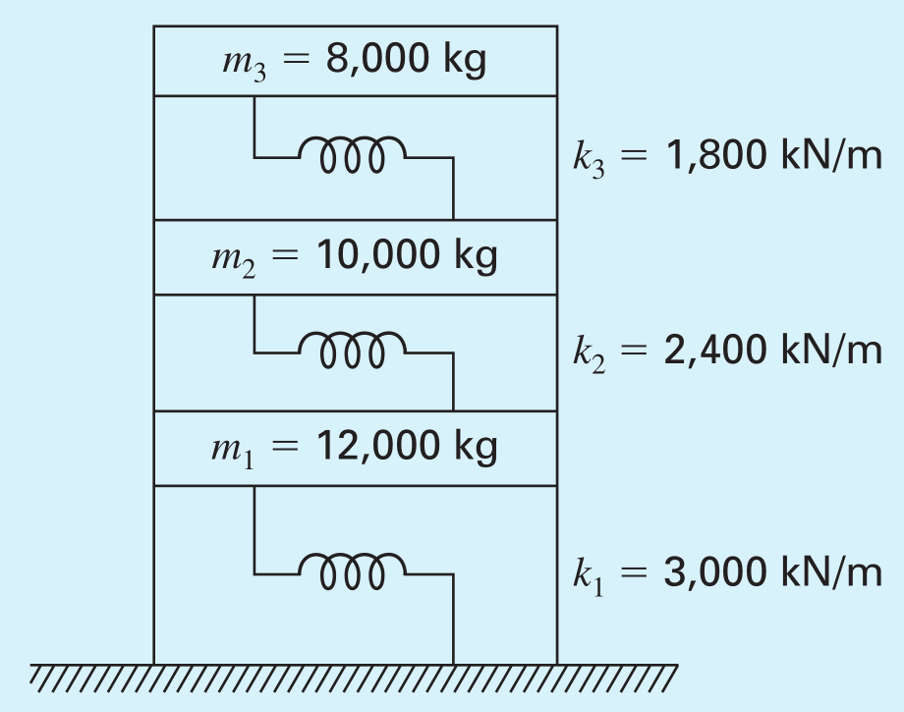
<p style="text-align: center;"> Figura 5: Modelo massa-mola para o Exercício #2.</p>

Neste caso, a análise é limitada ao movimento horizontal da estrutura à medida que é submetida ao movimento da base horizontal devido a terremotos.

Balanços dinâmicos de força podem ser desenvolvidos para este sistema, resultando em

$\begin{align}
&\left(\frac{k_1+k_2}{m_1} - \omega_n^2\right)X_1 &- \frac{k_2}{m_1}X_2 & &= 0 \\
&-\frac{k_2}{m_2}X_1 &+ \left(\frac{k_2+k_3}{m_2}-\omega_n^2\right)X_2 &- \frac{k_3}{m_2}X_3 &= 0 \\
& &- \frac{k_3}{m_3}X_2 &+ \left(\frac{k_3}{m_3}-\omega_n^2\right)X_3 &= 0
\end{align}$

em que $X_i$ representa os deslocamentos horizontais dos pavimentos [m], e $\omega_n$ é a frequência natural [rad/s]. As frequências naturais podem ser expressas em Hertz [ciclos/s] ao dividí-la por 2$\pi$ rad/ciclo.

**Determine os autovetores, os autovalores e as frequências naturais em ciclos/s para o modelo supracitado.**

In [117]:
# Escreva seu código aqui
